# Impact of Screen Time on Mental Health

Project details:
In this project, we preprocessed key screen-time and mental-health features, applied three unsupervised clustering algorithms (K-Means, Gaussian Mixture Model, and Hierarchical clustering), evaluated the quality of the clusters using metrics like the silhouette score, and visualized the resulting groups in 2D using PCA.


This dataset we used explores the relationship between digital device usage (screen time) and various mental health indicators among individuals. The data captures self-reported usage patterns of phones, laptops, tablets, and TVs, as well as daily habits, mood, stress levels, physical activity, and mental well-being scores. It aims to provide insights into how modern digital lifestyles affect mental health.

the data: https://www.kaggle.com/datasets/khushikyad001/impact-of-screen-time-on-mental-health

Group Members:

- Melaf Alobidan 422205737

- Joud Abdulrahman Alharbi 431201496  

- Leen Alakeel 431201817

- Layan Almoqaiteeb 431201486

- Aryam Alrsheedi 431201290


In [ ]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/digital_diet_mental_health.csv')

print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [ ]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   fl

# Data preprocessing

The dataset is scanned for duplicate rows to confirm data integrity.
Additionally, categorical variables such as gender and location_type are reviewed to understand their distributions and identify any imbalance before preprocessing.

In [ ]:
# Check duplicate
duplicate_rows = df[df.duplicated()]

#number of duplicate rows found
print(f"Number of duplicate rows found: {len(duplicate_rows)}")

# Display the duplicate rows if any
if not duplicate_rows.empty:
    print("\nDuplicate Rows (first 5):")
    display(duplicate_rows.head())

Number of duplicate rows found: 0


In [ ]:
#check for any Unique values in gender an location
print("Unique values and counts for 'gender':")
display(df['gender'].value_counts())

print("\nUnique values and counts for 'location_type':")
display(df['location_type'].value_counts())

Unique values and counts for 'gender':


,count
gender,
Female,935
Male,882
Other,183



Unique values and counts for 'location_type':


,count
location_type,
Urban,999
Suburban,605
Rural,396


In [ ]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

Descriptive statistics for numerical columns:


,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,mood_rating,stress_level,physical_activity_hours_per_week,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000
mean,38.805500,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,...,5.591000,5.541500,3.087150,49.650500,0.387500,0.507500,148.07970,9.887500,10.04900,10.753750
std,14.929203,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,...,2.899814,2.885731,1.885258,17.546717,0.487301,0.500069,48.86066,6.027853,6.05334,7.340269
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,...,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.80000,0.000000,0.00000,0.000000
25%,26.000000,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,...,3.000000,3.000000,1.600000,35.000000,0.000000,0.000000,113.90000,5.000000,5.00000,4.900000
50%,39.000000,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,...,6.000000,6.000000,3.000000,49.000000,0.000000,1.000000,147.45000,10.000000,10.00000,10.400000
75%,51.000000,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,...,8.000000,8.000000,4.400000,64.250000,1.000000,1.000000,180.70000,15.000000,15.00000,15.800000
max,64.000000,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,...,10.000000,10.000000,9.700000,80.000000,1.000000,1.000000,364.90000,20.000000,20.00000,36.400000


# Clustering Model Selection and Training

Feature Selection and Scaling

Seven numerical features related to digital habits and mental-health indicators are isolated for analysis. These variables represent the primary behavioral and psychological dimensions used in the clustering process.

In [ ]:
# Selecting the 7 key features related to mental health and lifestyle
key_features = [
    'daily_screen_time_hours',
    'sleep_quality',
    'stress_level',
    'mood_rating',
    'weekly_anxiety_score',
    'weekly_depression_score',
    'mental_health_score'
]

print(f"Selected {len(key_features)} primary features for analysis.")
print(f"Features: {key_features}")

# Extract features and scale the data
X_selected = df[key_features].copy()
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

print("\nFeature Scaling Complete.")

Selected 7 primary features for analysis.
Features: ['daily_screen_time_hours', 'sleep_quality', 'stress_level', 'mood_rating', 'weekly_anxiety_score', 'weekly_depression_score', 'mental_health_score']

Feature Scaling Complete.


The selected features are scaled using z-score normalization to ensure all variables operate on the same numerical range. Standardization prevents features with larger scales from disproportionately influencing the clustering algorithms.

# k-means

K-Means is evaluated across multiple values of k to determine an appropriate cluster configuration. Silhouette scores are computed to quantify the separation between clusters and guide the selection of the optimal cluster count.

In [ ]:
inertia_values = []
silhouette_scores = []
k_range = range(2, 6)  # Test k from 2 to 5

print("Analyzing optimal k for the selected features (k=2 to k=5):")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
    kmeans.fit(X_scaled_selected)
    inertia_values.append(kmeans.inertia_)

    score = silhouette_score(X_scaled_selected, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"  k={k}: Silhouette Score = {score:.3f}")

# The best k based on the highest silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\nBest K suggested by Silhouette Analysis: {best_k}")

Analyzing optimal k for the selected features (k=2 to k=5):
  k=2: Silhouette Score = 0.109
  k=3: Silhouette Score = 0.098
  k=4: Silhouette Score = 0.105
  k=5: Silhouette Score = 0.106

Best K suggested by Silhouette Analysis: 2


In [ ]:
optimal_k = 2
print(f"APPLYING FINAL K-MEANS (k={optimal_k})")

APPLYING FINAL K-MEANS (k=2)


K-Means is applied using the chosen value of k, and cluster labels are assigned to each observation. The resulting clusters reflect distinct patterns in mental-health and digital-behavioral attributes within the dataset.

In [ ]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
kmeans_labels_new = final_kmeans.fit_predict(X_scaled_selected)
df['KMeans_New_Cluster'] = kmeans_labels_new

silh_kmeans_new = silhouette_score(X_scaled_selected, kmeans_labels_new)
print(f"New Silhouette Score (K-Means - Selected Features): **{silh_kmeans_new:.3f}**")

# Cluster Analysis
cluster_analysis_new = df.groupby('KMeans_New_Cluster')[key_features].mean()
print("\nCluster Characteristics (K-Means - Selected Features - Mean Values):")
display(cluster_analysis_new.round(2))

New Silhouette Score (K-Means - Selected Features): **0.109**

Cluster Characteristics (K-Means - Selected Features - Mean Values):


,daily_screen_time_hours,sleep_quality,stress_level,mood_rating,weekly_anxiety_score,weekly_depression_score,mental_health_score
KMeans_New_Cluster,,,,,,,
0,5.85,5.56,5.27,6.13,9.16,4.87,49.64
1,6.20,5.57,5.80,5.08,10.59,15.04,49.66


Principal Component Analysis (PCA) is used to project the multidimensional data into two components for visualization. The scatter plot illustrates how K-Means partitions the data in this reduced space.

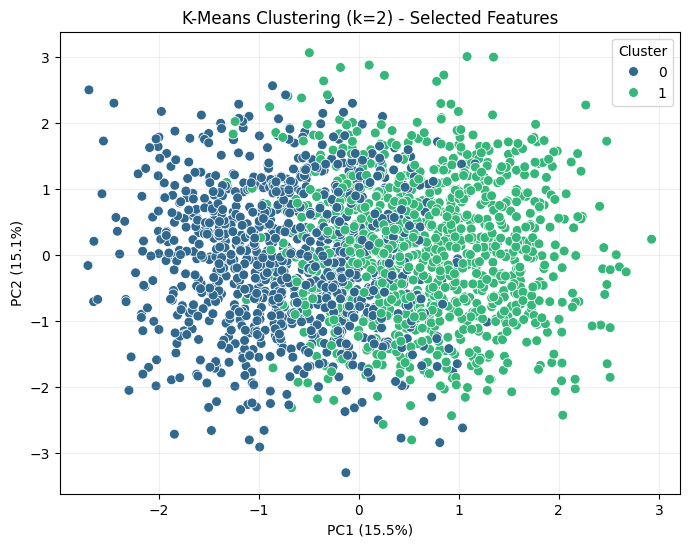


--- Silhouette Score Comparison ---
Original K-Means (22 Features): 0.040
New K-Means (7 Features): 0.109


In [ ]:
# Apply PCA to the selected features only
pca = PCA(n_components=2)
X_pca_new = pca.fit_transform(X_scaled_selected)
df['pca1_new'] = X_pca_new[:, 0]
df['pca2_new'] = X_pca_new[:, 1]

plt.figure(figsize=(8, 6))

# K-Means Plot (New Features)
sns.scatterplot(
    data=df,
    x='pca1_new', y='pca2_new',
    hue='KMeans_New_Cluster',
    palette='viridis',
    s=50
)
plt.title(f"K-Means Clustering (k={optimal_k}) - Selected Features")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.grid(True, alpha=0.2)
plt.legend(title="Cluster")
plt.show()
print("\n--- Silhouette Score Comparison ---")
print(f"Original K-Means (22 Features): 0.040")
print(f"New K-Means ({len(key_features)} Features): {silh_kmeans_new:.3f}")

# Gaussian Mixture Models (GMM) Analysis

A Gaussian Mixture Model is fitted to the standardized dataset to identify clusters based on probabilistic density distributions. This method provides a flexible alternative to the hard assignments produced by K-Means.

In [ ]:
# n_components is the number of clusters (k=2)
gmm = GaussianMixture(n_components=optimal_k, random_state=42, n_init=10)
gmm.fit(X_scaled_selected)
gmm_labels = gmm.predict(X_scaled_selected)
df['GMM_Cluster'] = gmm_labels

# 2. Evaluate GMM using Silhouette Score
silh_gmm = silhouette_score(X_scaled_selected, gmm_labels)
print(f"New Silhouette Score (GMM - Selected Features): **{silh_gmm:.3f}**")

# 3. Cluster Characteristics Analysis (GMM)
print("\nCluster Characteristics (GMM - Selected Features - Mean Values):")
gmm_analysis = df.groupby('GMM_Cluster')[key_features].mean()
display(gmm_analysis.round(2))

New Silhouette Score (GMM - Selected Features): **0.108**

Cluster Characteristics (GMM - Selected Features - Mean Values):


,daily_screen_time_hours,sleep_quality,stress_level,mood_rating,weekly_anxiety_score,weekly_depression_score,mental_health_score
GMM_Cluster,,,,,,,
0,6.11,5.65,2.99,5.63,9.76,9.92,49.65
1,5.94,5.48,8.02,5.55,10.01,10.17,49.65


The cluster assignments generated by the GMM are represented in the same PCA space, enabling direct comparison of grouping behaviour between K-Means and GMM.

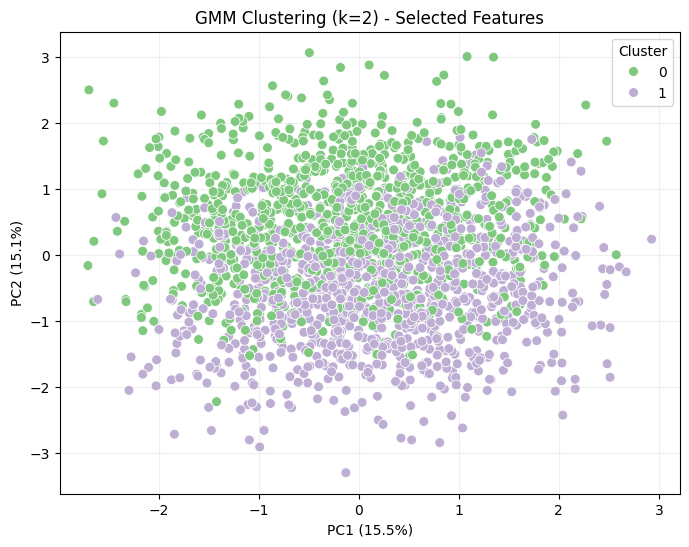


--- Final Performance Comparison (k=2) ---
K-Means Silhouette Score: 0.109
GMM Silhouette Score: 0.108


In [ ]:
# 4. GMM PCA Visualization
plt.figure(figsize=(8, 6))

# GMM Plot (New Features)
sns.scatterplot(
    data=df,
    x='pca1_new', y='pca2_new',
    hue='GMM_Cluster',
    palette='Accent',
    s=50
)
plt.title(f"GMM Clustering (k={optimal_k}) - Selected Features")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.grid(True, alpha=0.2)
plt.legend(title="Cluster")
plt.show()

# 5. Final Comparison Summary
print("\n--- Final Performance Comparison (k=2) ---")
print(f"K-Means Silhouette Score: {silh_kmeans_new:.3f}")
print(f"GMM Silhouette Score: {silh_gmm:.3f}")

# Hierarchical Clustering

Hierarchical clustering is performed using Ward’s linkage, and a dendrogram is generated to visualize the progressive merging of observations. This hierarchical structure offers insight into potential clustering thresholds.

APPLYING HIERARCHICAL CLUSTERING (k=2)
Generating linkage matrix using 'ward' method...


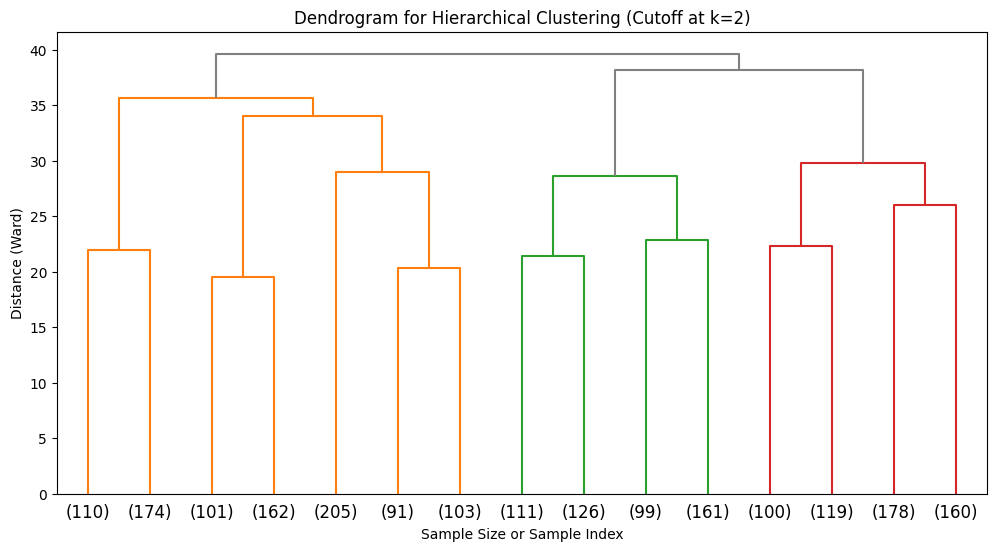

In [ ]:
print(f"APPLYING HIERARCHICAL CLUSTERING (k={optimal_k})")

# 1. Generate Linkage Matrix (for Dendrogram)
print("Generating linkage matrix using 'ward' method...")
linkage_matrix = linkage(X_scaled_selected, method='ward')

# 2. Plot Dendrogram
plt.figure(figsize=(12, 6))
# Set the color threshold to the distance at which the matrix forms (optimal_k) clusters
color_threshold = linkage_matrix[-(optimal_k), 2]

dendrogram(
    linkage_matrix,
    truncate_mode='lastp', # Display only the last p merged clusters
    p=15,
    show_leaf_counts=True,
    color_threshold=color_threshold,
    above_threshold_color='grey'
)
plt.title(f"Dendrogram for Hierarchical Clustering (Cutoff at k={optimal_k})")
plt.xlabel("Sample Size or Sample Index")
plt.ylabel("Distance (Ward)")
plt.show()

The hierarchical clustering results are visualized in the PCA-transformed space to examine how this method organizes the observations and how its grouping structure compares with the other clustering techniques.

In [ ]:
#Agglomerative Clustering
hc_final = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hc_labels_final = hc_final.fit_predict(X_scaled_selected)
df['HC_Final_Cluster'] = hc_labels_final

#Calculate Silhouette Score
silh_hc_final = silhouette_score(X_scaled_selected, hc_labels_final)
print(f"New Silhouette Score (Hierarchical - Selected Features): **{silh_hc_final:.3f}**")

#Cluster Characteristics Analysis (Hierarchical)
print("\nCluster Characteristics (Hierarchical - Selected Features - Mean Values):")
hc_analysis_final = df.groupby('HC_Final_Cluster')[key_features].mean()
display(hc_analysis_final.round(2))

New Silhouette Score (Hierarchical - Selected Features): **0.057**

Cluster Characteristics (Hierarchical - Selected Features - Mean Values):


,daily_screen_time_hours,sleep_quality,stress_level,mood_rating,weekly_anxiety_score,weekly_depression_score,mental_health_score
HC_Final_Cluster,,,,,,,
0,6.15,5.52,6.17,5.16,12.32,8.04,48.30
1,5.89,5.62,4.84,6.07,7.18,12.29,51.15


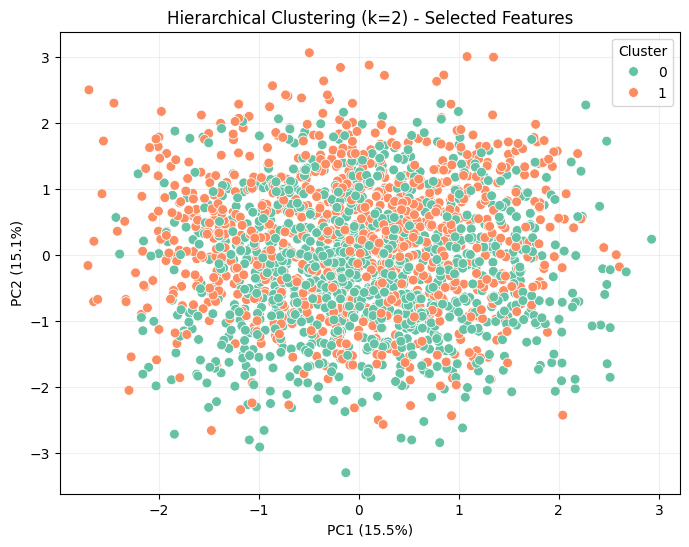

In [ ]:
#Hierarchical PCA Visualization
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='pca1_new', y='pca2_new', # Use the same PCA components
    hue='HC_Final_Cluster',
    palette='Set2', # Use a distinct palette
    s=50
)
plt.title(f"Hierarchical Clustering (k={optimal_k}) - Selected Features")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.grid(True, alpha=0.2)
plt.legend(title="Cluster")
plt.show()

In [ ]:
#Final Performance Comparison Summary (All 3 Algorithms)
# Retrieve scores from previous steps (using the values you provided)
silh_kmeans = 0.109
silh_gmm = 0.108

print("\n# --- FINAL PERFORMANCE COMPARISON (k=2) ---")
print(f"K-Means Silhouette Score: {silh_kmeans:.3f}")
print(f"GMM Silhouette Score: {silh_gmm:.3f}")
print(f"Hierarchical Silhouette Score: {silh_hc_final:.3f}") # The new score from this step


# --- FINAL PERFORMANCE COMPARISON (k=2) ---
K-Means Silhouette Score: 0.109
GMM Silhouette Score: 0.108
Hierarchical Silhouette Score: 0.057


#Evaluation and Interpretation:

Using K-Means with k = 2 on the 7 selected features
(daily_screen_time_hours, sleep_quality, stress_level, mood_rating, weekly_anxiety_score, weekly_depression_score, mental_health_score), the cluster‐means table shows two clear profiles:

Cluster A – “Lower-risk / better mood group”
Slightly lower daily screen time (≈ 5.9 hours),
Lower stress, lower weekly anxiety and depression scores,
Higher mood rating (around 6+ on average),
Sleep quality and overall mental_health_score are mid-range and very similar to the other cluster,
Overall, this group looks more emotionally stable with fewer reported symptoms,

Cluster B – “Higher-risk / heavier screen group”
Slightly higher daily screen time (≈ 6.2 hours)
Higher stress level,
Noticeably higher weekly anxiety and ,depression scores (depression roughly three times higher than the lower-risk group),
Lower mood rating (around 5 on average),
Sleep quality and the composite ,mental_health_score don’t change much, but the symptom-based scores clearly worsen

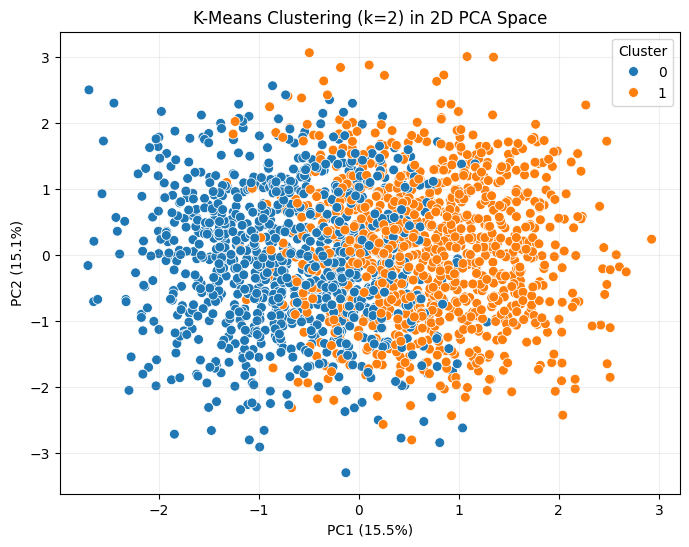

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_selected)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='pca1', y='pca2',
    hue='KMeans_New_Cluster',
    s=50
)

plt.title(f"K-Means Clustering (k={optimal_k}) in 2D PCA Space")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.grid(True, alpha=0.2)
plt.legend(title="Cluster")
plt.show()


The 2D PCA visualization shows two partially separated groups, where one cluster is associated with higher screen time and worse mental-health indicators, and the other with slightly lower screen time and better emotional scores, with some overlap between the clusters

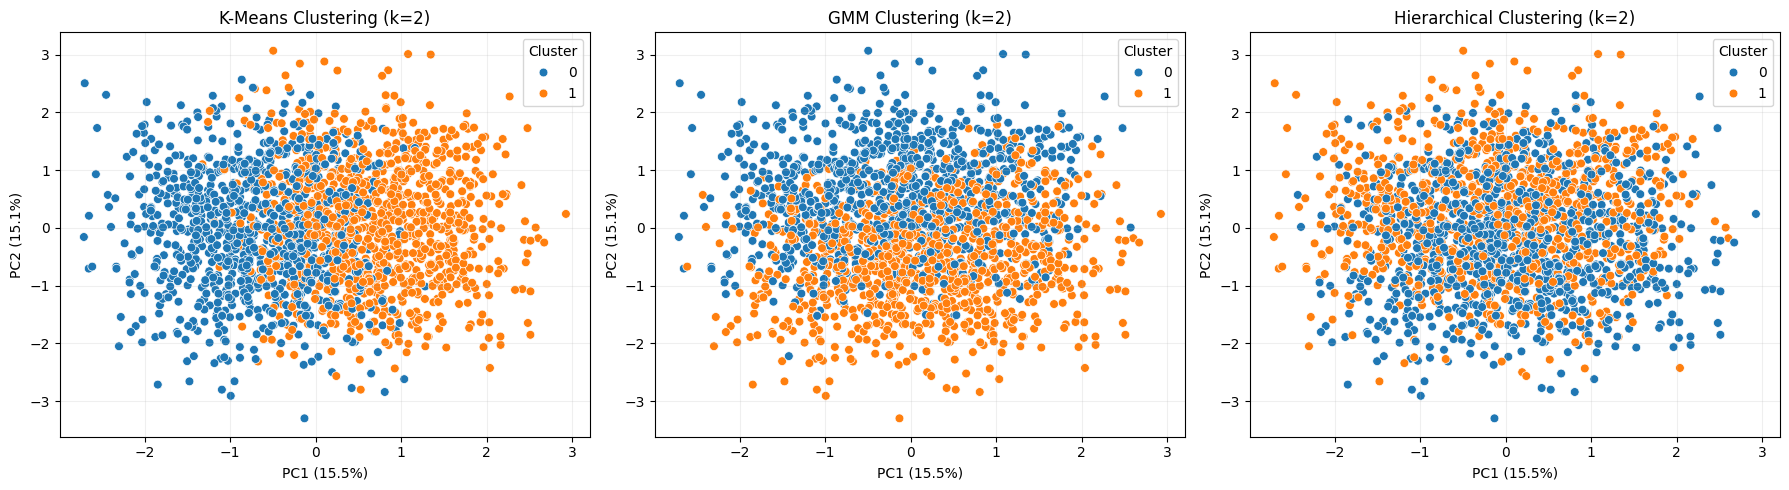

In [ ]:
# Recompute PCA for visualization (2 components)
pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_scaled_selected)

df['pca1_vis'] = X_pca_vis[:, 0]
df['pca2_vis'] = X_pca_vis[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) K-Means
sns.scatterplot(
    data=df,
    x='pca1_vis', y='pca2_vis',
    hue='KMeans_New_Cluster',
    s=40,
    ax=axes[0]
)
axes[0].set_title(f"K-Means Clustering (k={optimal_k})")
axes[0].set_xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]:.1%})")
axes[0].set_ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]:.1%})")
axes[0].grid(True, alpha=0.2)
axes[0].legend(title="Cluster")

# 2) GMM
sns.scatterplot(
    data=df,
    x='pca1_vis', y='pca2_vis',
    hue='GMM_Cluster',
    s=40,
    ax=axes[1]
)
axes[1].set_title(f"GMM Clustering (k={optimal_k})")
axes[1].set_xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]:.1%})")
axes[1].set_ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]:.1%})")
axes[1].grid(True, alpha=0.2)
axes[1].legend(title="Cluster")

# 3) Hierarchical
sns.scatterplot(
    data=df,
    x='pca1_vis', y='pca2_vis',
    hue='HC_Final_Cluster',
    s=40,
    ax=axes[2]
)
axes[2].set_title(f"Hierarchical Clustering (k={optimal_k})")
axes[2].set_xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]:.1%})")
axes[2].set_ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]:.1%})")
axes[2].grid(True, alpha=0.2)
axes[2].legend(title="Cluster")

plt.tight_layout()
plt.show()


### Interpretation of PCA Clustering Results

The three PCA scatter plots show how the dataset is grouped when using different clustering algorithms.
Each point represents an individual, and the two PCA components combine all seven selected mental-health
and lifestyle features (screen time, sleep quality, stress level, mood rating, weekly anxiety, weekly depression, and mental health score).

**K-Means (Left):**  
The data is separated into two clear groups, although the boundary between clusters is soft.
K-Means assumes spherical clusters, so the separation appears more balanced and symmetrical.

**GMM (Middle):**  
Gaussian Mixture Models produce similar clusters to K-Means but allow for more flexible boundaries.  
GMM identifies slight variations in density across the two groups, resulting in smoother transitions between clusters.

**Hierarchical Clustering (Right):**  
Hierarchical clustering creates the loosest separation.  
Because it uses distance-based merging, the clusters overlap more, showing that the dataset does not form strongly distinct hierarchical groupings.

Overall, all three models reveal two main clusters, but the separation is not very strong, which aligns with the moderate silhouette scores calculated earlier.
